### Introduction
In this note book we will do EDA on the reviews and feedback, reviews are just for food and feedback includes anyfeed back from food to the review for the platform

### Exploratory Analysis
To begin this exploratory analysis, first use matplotlib to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made.

In [1]:
import pandas as pd
import numpy as np

Let's upload all the files


In [2]:
fpath_feedback = '../data/feedback.csv'
fpath_review = '../data/review.csv'
fpath_yelp = '../data/yelp_review_cropped.csv'

feedback = pd.read_csv (fpath_feedback)
reviews = pd.read_csv (fpath_review)
yelp = pd.read_csv (fpath_yelp)


In [3]:
nRow, nCol = feedback.shape
print(f'There are {nRow} rows and {nCol} columns for feedback')

There are 802 rows and 7 columns for feedback


In [4]:
nRow, nCol = reviews.shape
print(f'There are {nRow} rows and {nCol} columns for reviews')

There are 74 rows and 12 columns for reviews


In [5]:
nRow, nCol = yelp.shape
print(f'There are {nRow} rows and {nCol} columns for reviews')

There are 9000 rows and 9 columns for reviews


Let's take a quick look at what the data looks like:

In [6]:
reviews.head()

,Id,Message,Rating,CreatedDate,UserId,MenuBookItemInfoId,Status,Bitter,Salty,Savory,Sour,Sweet
0,84,rrrrrrr,4,2019-09-30T20:46:57.829856Z,1,7,3,NaN,NaN,NaN,NaN,NaN
1,76,⁦✌️⁩⁦✌️⁩👍👍😍,3,2019-07-13T04:18:21.348956Z,4,320,3,NaN,NaN,NaN,NaN,NaN
2,74,Best sooooooosis,5,2019-06-17T04:16:12.559684Z,105,320,3,NaN,NaN,NaN,NaN,NaN
3,47,Wow It is so good,5,2019-01-02T21:12:35.894906Z,8,40,3,NaN,NaN,NaN,NaN,NaN
4,44,Wow so good,4,2018-12-24T08:18:51.017771Z,8,299,3,NaN,NaN,NaN,NaN,NaN


In [7]:
feedback.head()

,Id,VirtualMenuStar,OrderingProcessStar,OnlinePaymentStar,OtherComments,UserOrderId,CreatedDate
0,802,5,5,5,NaN,14777,2022-01-16T00:43:33.844237Z
1,801,5,1,5,Food arrived 50 minutes later than the request...,14479,2021-12-08T17:26:32.295815Z
2,800,5,5,5,Smile,13892,2021-09-21T05:21:33.518309Z
3,799,5,5,5,NaN,13886,2021-09-20T02:11:48.826812Z
4,798,5,5,5,Your hammer sandwich that you say is Spicy but...,13607,2021-08-29T23:56:25.635394Z


In [8]:
yelp.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,B4sSnDIAzHUh8YSFu1LNeg,BytRWk8X1OelSgwwfXd8Aw,SNn_I8VMds60C4bSXCyUtw,5,2015-11-29,Every dish we tried was cooked to perfection w...,2,1,3
1,P22ibdsG1tryITxKEK_a4Q,BytRWk8X1OelSgwwfXd8Aw,rfa_0AOmpwLTj32RL2Zvyw,5,2014-11-06,yum yum yum!\n\nWent with a party of four - we...,1,0,1
2,SR6d_AmgGBK10ieEHsqk0Q,BytRWk8X1OelSgwwfXd8Aw,ky8BMyjQm83cqq9fx_Rn3w,3,2016-05-03,I get the whole rustic coffee shop feel that i...,2,0,0
3,ceg_wwrykBiqITCqP411kw,BytRWk8X1OelSgwwfXd8Aw,t7R-p3dhGV78dSARAFKEOA,5,2015-07-18,Amazing place for lunch.\n\nThe salads are del...,1,0,0
4,Ft62sweGiYYZyAjinuTbVg,BytRWk8X1OelSgwwfXd8Aw,NncsqhAElh0zykYdUULByg,4,2016-01-24,The standard for decor and atmosphere for Mont...,1,0,1


### 1. Sentiment Analysis for Feedback

In [9]:
feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   802 non-null    int64 
 1   VirtualMenuStar      802 non-null    int64 
 2   OrderingProcessStar  802 non-null    int64 
 3   OnlinePaymentStar    802 non-null    int64 
 4   OtherComments        155 non-null    object
 5   UserOrderId          802 non-null    int64 
 6   CreatedDate          802 non-null    object
dtypes: int64(5), object(2)
memory usage: 44.0+ KB


In [10]:
feedback.isnull().sum()

Id                       0
VirtualMenuStar          0
OrderingProcessStar      0
OnlinePaymentStar        0
OtherComments          647
UserOrderId              0
CreatedDate              0
dtype: int64

In [11]:
# remove rows with null values
feedback.dropna(subset=['OtherComments'], inplace=True)
feedback.isnull().sum()

Id                     0
VirtualMenuStar        0
OrderingProcessStar    0
OnlinePaymentStar      0
OtherComments          0
UserOrderId            0
CreatedDate            0
dtype: int64

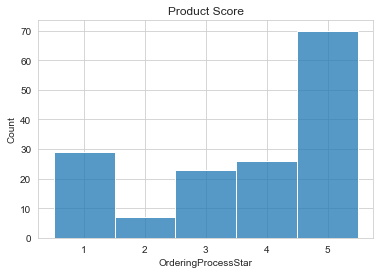

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot a histogram of Scores by count
sns.set_style('whitegrid')
sns.histplot(data=feedback, x='OrderingProcessStar', discrete=True)
plt.title('Product Score')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

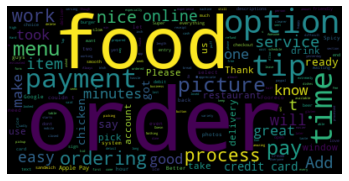

In [13]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
text = " ".join(review for review in feedback.OtherComments)
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# plot wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

In [14]:
feedback = feedback[feedback['OrderingProcessStar'] != 3]
feedback['Sentiment'] = feedback['OrderingProcessStar'].apply(lambda score: 1 if score > 3 else -1)
feedback.head()

,Id,VirtualMenuStar,OrderingProcessStar,OnlinePaymentStar,OtherComments,UserOrderId,CreatedDate,Sentiment
1,801,5,1,5,Food arrived 50 minutes later than the request...,14479,2021-12-08T17:26:32.295815Z,-1
2,800,5,5,5,Smile,13892,2021-09-21T05:21:33.518309Z,1
4,798,5,5,5,Your hammer sandwich that you say is Spicy but...,13607,2021-08-29T23:56:25.635394Z,1
8,794,5,5,5,Best Chicken Sandwich!!! Always delivers 😀,12645,2021-08-07T19:27:55.838135Z,1
11,791,4,5,5,More pictures of the food,12300,2021-08-02T05:32:12.709532Z,1


In [15]:
# split the dataframe
positive = feedback[feedback['Sentiment'] == 1]
negative = feedback[feedback['Sentiment'] == -1]

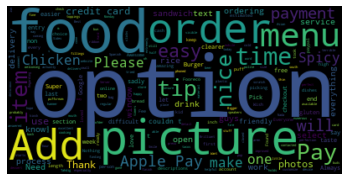

In [16]:
stopwords = set(STOPWORDS)
# remove 'good' and 'great' since they are in negative reviews
stopwords.update(["br", "href","good","great"])

positive_summary = " ".join(review for review in positive.OtherComments)
positive_wordcloud = WordCloud(stopwords=stopwords).generate(positive_summary)

plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

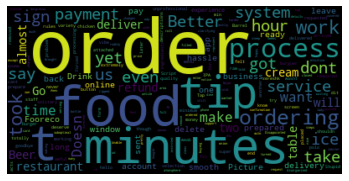

In [17]:
negative_summary = " ".join(review for review in negative.OtherComments)
negative_wordcloud = WordCloud(stopwords=stopwords).generate(negative_summary)

plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

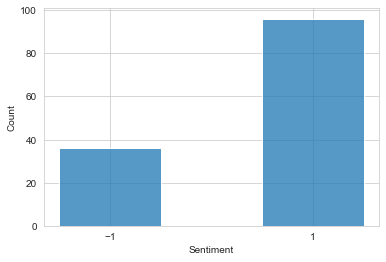

In [18]:
sns.histplot(data=feedback, x='Sentiment', discrete=True)
plt.xticks([-1, 1])
plt.show()

In [19]:
# remove punctuation from Summary and Text
def remove_punctuation(text):
    return "".join(c for c in text if c not in ("?", ".", ";", ":",  "!",'"'))

feedback['OtherComments'] = feedback['OtherComments'].apply(remove_punctuation)

In [20]:
# split the train and test data
index = feedback.index
feedback['random_number'] = np.random.randn(len(index))
train = feedback[feedback['random_number'] <= 0.8]
test = feedback[feedback['random_number'] > 0.8]

In [21]:
# convert the text into a bag-of-words model
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

train_matrix = vectorizer.fit_transform(train['OtherComments'])
test_matrix = vectorizer.transform(test['OtherComments'])

In [22]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

X_train = train_matrix 
X_test = test_matrix
y_train = train['Sentiment']
y_test = test['Sentiment']

In [23]:
# fit the model on data and predict
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [24]:
# testing
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(predictions, y_test)

array([[ 2,  2],
       [ 4, 16]])

In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.87      0.74      0.80       352
           1       0.93      0.97      0.95      1202

    accuracy                           0.92      1554
   macro avg       0.90      0.86      0.87      1554
weighted avg       0.91      0.92      0.91      1554



### 2. Sentiment Analysis for Reviews


In [27]:
reviews.head()

,Id,Message,Rating,CreatedDate,UserId,MenuBookItemInfoId,Status,Bitter,Salty,Savory,Sour,Sweet
0,84,rrrrrrr,4,2019-09-30T20:46:57.829856Z,1,7,3,NaN,NaN,NaN,NaN,NaN
1,76,⁦✌️⁩⁦✌️⁩👍👍😍,3,2019-07-13T04:18:21.348956Z,4,320,3,NaN,NaN,NaN,NaN,NaN
2,74,Best sooooooosis,5,2019-06-17T04:16:12.559684Z,105,320,3,NaN,NaN,NaN,NaN,NaN
3,47,Wow It is so good,5,2019-01-02T21:12:35.894906Z,8,40,3,NaN,NaN,NaN,NaN,NaN
4,44,Wow so good,4,2018-12-24T08:18:51.017771Z,8,299,3,NaN,NaN,NaN,NaN,NaN


In [28]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  74 non-null     int64  
 1   Message             36 non-null     object 
 2   Rating              74 non-null     int64  
 3   CreatedDate         74 non-null     object 
 4   UserId              74 non-null     int64  
 5   MenuBookItemInfoId  74 non-null     int64  
 6   Status              74 non-null     int64  
 7   Bitter              0 non-null      float64
 8   Salty               3 non-null      float64
 9   Savory              3 non-null      float64
 10  Sour                2 non-null      float64
 11  Sweet               3 non-null      float64
dtypes: float64(5), int64(5), object(2)
memory usage: 7.1+ KB


In [29]:
# remove rows with null values
reviews.dropna(subset=['Message'], inplace=True)
reviews.isnull().sum()

Id                     0
Message                0
Rating                 0
CreatedDate            0
UserId                 0
MenuBookItemInfoId     0
Status                 0
Bitter                36
Salty                 36
Savory                36
Sour                  36
Sweet                 36
dtype: int64

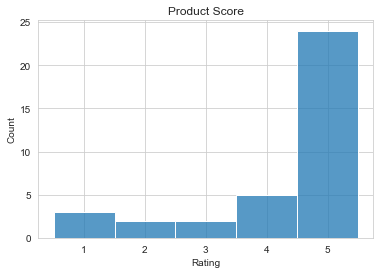

In [31]:
# plot a histogram of Scores by count
sns.set_style('whitegrid')
sns.histplot(data=reviews, x='Rating', discrete=True)
plt.title('Product Score')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

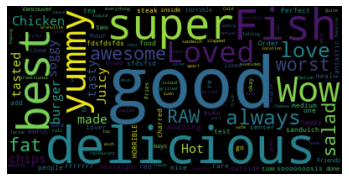

In [33]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
text = " ".join(review for review in reviews.Message)
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# plot wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

In [35]:
reviews = reviews[reviews['Rating'] != 3]
reviews['Sentiment'] = reviews['Rating'].apply(lambda score: 1 if score > 3 else -1)
reviews.head()

,Id,Message,Rating,CreatedDate,UserId,MenuBookItemInfoId,Status,Bitter,Salty,Savory,Sour,Sweet,Sentiment
0,84,rrrrrrr,4,2019-09-30T20:46:57.829856Z,1,7,3,NaN,NaN,NaN,NaN,NaN,1
2,74,Best sooooooosis,5,2019-06-17T04:16:12.559684Z,105,320,3,NaN,NaN,NaN,NaN,NaN,1
3,47,Wow It is so good,5,2019-01-02T21:12:35.894906Z,8,40,3,NaN,NaN,NaN,NaN,NaN,1
4,44,Wow so good,4,2018-12-24T08:18:51.017771Z,8,299,3,NaN,NaN,NaN,NaN,NaN,1
5,42,So yummy,5,2018-12-23T18:50:11.900859Z,45,299,3,NaN,NaN,NaN,NaN,NaN,1


In [36]:
# split the dataframe
positive = reviews[reviews['Sentiment'] == 1]
negative = reviews[reviews['Sentiment'] == -1]

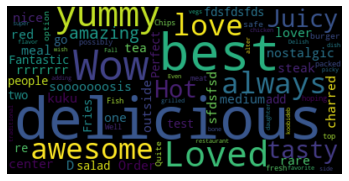

In [38]:
stopwords = set(STOPWORDS)
# remove 'good' and 'great' since they are in negative reviews
stopwords.update(["br", "href","good","great"])

positive_summary = " ".join(review for review in positive.Message)
positive_wordcloud = WordCloud(stopwords=stopwords).generate(positive_summary)

plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

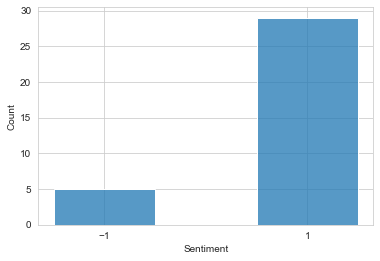

In [39]:
sns.histplot(data=reviews, x='Sentiment', discrete=True)
plt.xticks([-1, 1])
plt.show()

In [40]:
# remove punctuation from Summary and Text
reviews['Message'] = reviews['Message'].apply(remove_punctuation)

In [41]:
# split the train and test data
index = reviews.index
reviews['random_number'] = np.random.randn(len(index))
train = reviews[reviews['random_number'] <= 0.8]
test = reviews[reviews['random_number'] > 0.8]

In [43]:
# convert the text into a bag-of-words model
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

train_matrix = vectorizer.fit_transform(train['Message'])
test_matrix = vectorizer.transform(test['Message'])

In [44]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

X_train = train_matrix 
X_test = test_matrix
y_train = train['Sentiment']
y_test = test['Sentiment']

In [45]:
# fit the model on data and predict
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [46]:
# testing
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(predictions, y_test)

array([[0, 0],
       [1, 9]])

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.87      0.74      0.80       352
           1       0.93      0.97      0.95      1202

    accuracy                           0.92      1554
   macro avg       0.90      0.86      0.87      1554
weighted avg       0.91      0.92      0.91      1554



### 3. Sentiment Analysis for Yelp

In [48]:
yelp.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,B4sSnDIAzHUh8YSFu1LNeg,BytRWk8X1OelSgwwfXd8Aw,SNn_I8VMds60C4bSXCyUtw,5,2015-11-29,Every dish we tried was cooked to perfection w...,2,1,3
1,P22ibdsG1tryITxKEK_a4Q,BytRWk8X1OelSgwwfXd8Aw,rfa_0AOmpwLTj32RL2Zvyw,5,2014-11-06,yum yum yum!\n\nWent with a party of four - we...,1,0,1
2,SR6d_AmgGBK10ieEHsqk0Q,BytRWk8X1OelSgwwfXd8Aw,ky8BMyjQm83cqq9fx_Rn3w,3,2016-05-03,I get the whole rustic coffee shop feel that i...,2,0,0
3,ceg_wwrykBiqITCqP411kw,BytRWk8X1OelSgwwfXd8Aw,t7R-p3dhGV78dSARAFKEOA,5,2015-07-18,Amazing place for lunch.\n\nThe salads are del...,1,0,0
4,Ft62sweGiYYZyAjinuTbVg,BytRWk8X1OelSgwwfXd8Aw,NncsqhAElh0zykYdUULByg,4,2016-01-24,The standard for decor and atmosphere for Mont...,1,0,1


In [50]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    9000 non-null   object
 1   user_id      9000 non-null   object
 2   business_id  9000 non-null   object
 3   stars        9000 non-null   int64 
 4   date         9000 non-null   object
 5   text         9000 non-null   object
 6   useful       9000 non-null   int64 
 7   funny        9000 non-null   int64 
 8   cool         9000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 632.9+ KB


In [51]:
# remove rows with null values
yelp.dropna(subset=['text'], inplace=True)
yelp.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

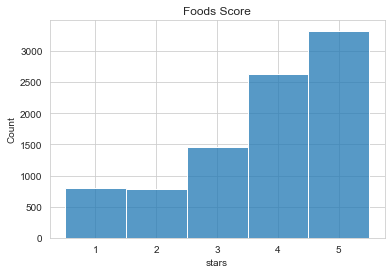

In [53]:
# plot a histogram of Scores by count
sns.set_style('whitegrid')
sns.histplot(data=yelp, x='stars', discrete=True)
plt.title('Foods Score')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

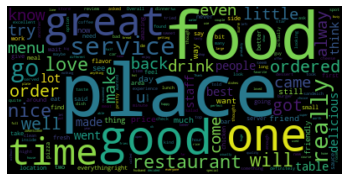

In [54]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
text = " ".join(text for text in yelp.text)
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# plot wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

In [56]:
yelp = yelp[yelp['stars'] != 3]
yelp['Sentiment'] = yelp['stars'].apply(lambda score: 1 if score > 3 else -1)
yelp.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,Sentiment
0,B4sSnDIAzHUh8YSFu1LNeg,BytRWk8X1OelSgwwfXd8Aw,SNn_I8VMds60C4bSXCyUtw,5,2015-11-29,Every dish we tried was cooked to perfection w...,2,1,3,1
1,P22ibdsG1tryITxKEK_a4Q,BytRWk8X1OelSgwwfXd8Aw,rfa_0AOmpwLTj32RL2Zvyw,5,2014-11-06,yum yum yum!\n\nWent with a party of four - we...,1,0,1,1
3,ceg_wwrykBiqITCqP411kw,BytRWk8X1OelSgwwfXd8Aw,t7R-p3dhGV78dSARAFKEOA,5,2015-07-18,Amazing place for lunch.\n\nThe salads are del...,1,0,0,1
4,Ft62sweGiYYZyAjinuTbVg,BytRWk8X1OelSgwwfXd8Aw,NncsqhAElh0zykYdUULByg,4,2016-01-24,The standard for decor and atmosphere for Mont...,1,0,1,1
5,Fspo02xWT7to6UE9HXwxnw,BytRWk8X1OelSgwwfXd8Aw,mkNDSH0DQlNAF4ml3MYpkg,4,2015-11-26,Stumbled upon this place when I was looking fo...,3,1,1,1


In [58]:
# split the dataframe
positive = yelp[yelp['Sentiment'] == 1]
negative = yelp[yelp['Sentiment'] == -1]

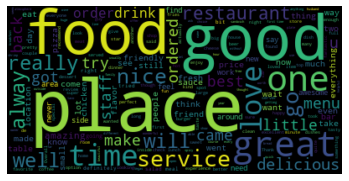

In [61]:
stopwords = set(STOPWORDS)
# remove 'good' and 'great' since they are in negative reviews
#stopwords.update(["br", "href","good","great","one"])

positive_summary = " ".join(review for review in positive.text)
positive_wordcloud = WordCloud(stopwords=stopwords).generate(positive_summary)

plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

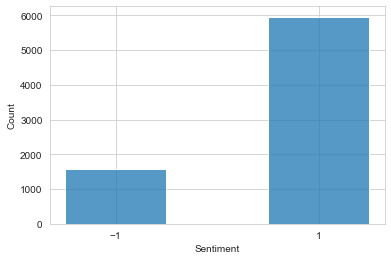

In [63]:
sns.histplot(data=yelp, x='Sentiment', discrete=True)
plt.xticks([-1, 1])
plt.show()

In [64]:
# remove punctuation from Summary and Text
yelp['text'] = yelp['text'].apply(remove_punctuation)

In [66]:
# split the train and test data
index = yelp.index
yelp['random_number'] = np.random.randn(len(index))
train = yelp[yelp['random_number'] <= 0.8]
test = yelp[yelp['random_number'] > 0.8]

In [67]:
# convert the text into a bag-of-words model
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

train_matrix = vectorizer.fit_transform(train['text'])
test_matrix = vectorizer.transform(test['text'])

In [68]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

X_train = train_matrix 
X_test = test_matrix
y_train = train['Sentiment']
y_test = test['Sentiment']

In [69]:
# fit the model on data and predict
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [74]:
# testing
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(predictions, y_test)

array([[ 262,   40],
       [  90, 1162]])

In [77]:
# report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.87      0.74      0.80       352
           1       0.93      0.97      0.95      1202

    accuracy                           0.92      1554
   macro avg       0.90      0.86      0.87      1554
weighted avg       0.91      0.92      0.91      1554

